In [12]:
# Step 1: Run the imports and setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [13]:
# Step 2: Run the corrected function definition
def create_sample_air_quality_data():
    # Generate dates for the past year
    end_date = datetime(2024, 1, 31)
    start_date = datetime(2023, 2, 1)
    dates = pd.date_range(start=start_date, end=end_date, freq='D')
    
    # Create sample data with realistic patterns
    np.random.seed(42)
    
    data = []
    for date in dates:
        seasonal_factor = 1 + 0.3 * np.sin(2 * np.pi * (date.month - 1) / 12)
        weekend_factor = 0.9 if date.weekday() >= 5 else 1.0
        random_variation = np.random.normal(1, 0.1)
        base_aqi = 50 + 30 * seasonal_factor * weekend_factor * random_variation
        
        if np.random.random() < 0.02:
            base_aqi = min(300, base_aqi * 2.5)
        
        pm25 = max(5, base_aqi / 20 + np.random.normal(0, 2))
        pm10 = max(10, base_aqi / 15 + np.random.normal(0, 3))
        no2 = max(10, base_aqi / 25 + np.random.normal(0, 1))
        o3 = max(20, base_aqi / 30 + np.random.normal(0, 1.5))
        
        data.append({
            'date': date,
            'aqi': max(0, min(500, base_aqi)),
            'pm2_5': pm25,
            'pm10': pm10,
            'no2': no2,
            'o3': o3,
            'month': date.month,
            'year': date.year,
            'day_of_week': date.weekday(),
            'season': (date.month % 12 + 3) // 3
        })
    
    return pd.DataFrame(data)

In [14]:
# Step 3: Create the dataset
df = create_sample_air_quality_data()
print("Dataset created successfully!")
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
df.head()

Dataset created successfully!
Dataset shape: (365, 10)

First few rows:


,date,aqi,pm2_5,pm10,no2,o3,month,year,day_of_week,season
0,2023-02-01,86.213664,5.000000,10.0,10.0,20,2,2023,2,1
1,2023-02-02,87.986278,5.000000,10.0,10.0,20,2,2023,3,1
2,2023-02-03,85.334770,5.000000,10.0,10.0,20,2,2023,4,1
3,2023-02-04,78.744827,6.868539,10.0,10.0,20,2,2023,5,1
4,2023-02-05,79.359692,5.000000,10.0,10.0,20,2,2023,6,1


In [15]:
# Step 4: Data cleaning and exploration
print("Dataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

# Convert date to datetime index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

print("Data cleaning completed!")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         365 non-null    datetime64[ns]
 1   aqi          365 non-null    float64       
 2   pm2_5        365 non-null    float64       
 3   pm10         365 non-null    float64       
 4   no2          365 non-null    float64       
 5   o3           365 non-null    int64         
 6   month        365 non-null    int64         
 7   year         365 non-null    int64         
 8   day_of_week  365 non-null    int64         
 9   season       365 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(5)
memory usage: 28.6 KB
None

Basic Statistics:
                                date         aqi       pm2_5        pm10  \
count                            365  365.000000  365.000000  365.000000   
mean   2023-08-01 23:59:59.999999744   79.81360

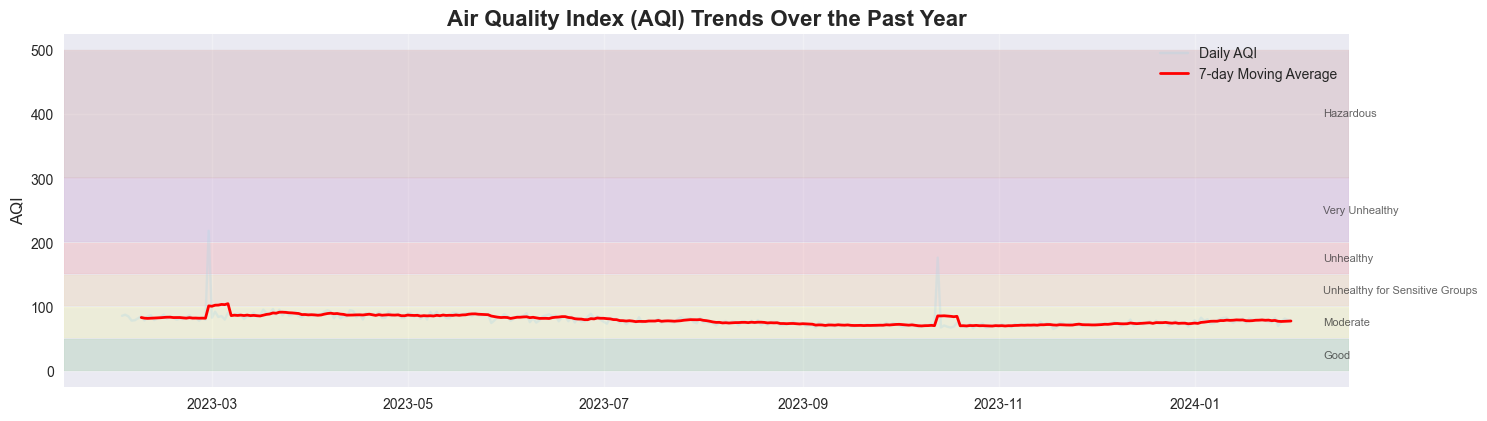

In [16]:
# Visualization 1: AQI trends over time with rolling average
plt.figure(figsize=(15, 8))

# Plot daily AQI
plt.subplot(2, 1, 1)
plt.plot(df.index, df['aqi'], alpha=0.3, color='lightblue', label='Daily AQI')
# Add 7-day rolling average for smoother trend
plt.plot(df.index, df['aqi'].rolling(window=7).mean(), color='red', linewidth=2, label='7-day Moving Average')
plt.title('Air Quality Index (AQI) Trends Over the Past Year', fontsize=16, fontweight='bold')
plt.ylabel('AQI', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# AQI categories reference
aqi_categories = {
    'Good': (0, 50),
    'Moderate': (51, 100),
    'Unhealthy for Sensitive Groups': (101, 150),
    'Unhealthy': (151, 200),
    'Very Unhealthy': (201, 300),
    'Hazardous': (301, 500)
}

colors = ['green', 'yellow', 'orange', 'red', 'purple', 'maroon']
y_pos = 400

for i, (category, (low, high)) in enumerate(aqi_categories.items()):
    plt.axhspan(low, high, alpha=0.1, color=colors[i])
    plt.text(df.index[-1] + timedelta(days=10), (low + high) / 2, category, 
             fontsize=8, va='center', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
# Visualization 2: Monthly comparison of air quality
plt.figure(figsize=(15, 10))

# Subplot 1: Monthly average AQI
plt.subplot(2, 2, 1)
monthly_avg = df.groupby('month')['aqi'].mean()
monthly_std = df.groupby('month')['aqi'].std()

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.bar(monthly_avg.index, monthly_avg.values, yerr=monthly_std.values, 
        capsize=5, alpha=0.7, color='skyblue', edgecolor='navy')
plt.title('Monthly Average AQI with Standard Deviation', fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.xticks(range(1, 13), months)

# Subplot 2: Seasonal AQI distribution
plt.subplot(2, 2, 2)
seasonal_data = df.groupby('season')['aqi'].apply(list)
seasons = ['Winter', 'Spring', 'Summer', 'Fall']

box_data = [seasonal_data[i+1] for i in range(4)]
plt.boxplot(box_data, labels=seasons)
plt.title('AQI Distribution by Season', fontweight='bold')
plt.ylabel('AQI')

# Subplot 3: Pollutant trends by month
plt.subplot(2, 2, 3)
pollutants = ['pm2_5', 'pm10', 'no2', 'o3']
pollutant_names = ['PM2.5', 'PM10', 'NO₂', 'O₃']

for i, pollutant in enumerate(pollutants):
    monthly_pollutant = df.groupby('month')[pollutant].mean()
    plt.plot(monthly_pollutant.index, monthly_pollutant.values, 
             marker='o', label=pollutant_names[i], linewidth=2)

plt.title('Monthly Average Pollutant Levels', fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Concentration (μg/m³)')
plt.xticks(range(1, 13), months)
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 4: AQI category distribution
plt.subplot(2, 2, 4)
aqi_categories_count = []
category_labels = []

for category, (low, high) in aqi_categories.items():
    count = len(df[(df['aqi'] >= low) & (df['aqi'] <= high)])
    aqi_categories_count.append(count)
    category_labels.append(category)

colors = ['green', 'yellow', 'orange', 'red', 'purple', 'maroon']
plt.pie(aqi_categories_count, labels=category_labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of AQI Categories', fontweight='bold')

plt.tight_layout()
plt.show()